In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
training_set = dataset_train.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


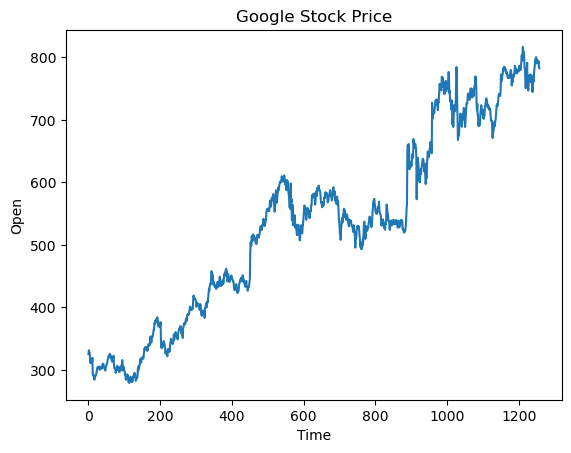

In [4]:
plt.plot(training_set)
plt.xlabel("Time")
plt.ylabel("Open")
plt.title("Google Stock Price")
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [6]:
x_train = []
y_train = []

for i in range(60,1258):
    x_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [7]:
print(x_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [8]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

In [9]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [10]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [12]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 25s 237ms/step - loss: 0.0415
Epoch 2/100
38/38 [==============================] - 10s 257ms/step - loss: 0.0074
Epoch 3/100
38/38 [==============================] - 9s 243ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 9s 242ms/step - loss: 0.0048
Epoch 5/100
38/38 [==============================] - 9s 245ms/step - loss: 0.0061
Epoch 6/100
38/38 [==============================] - 9s 239ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 9s 223ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 8s 220ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 8s 215ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 8s 215ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 8s 214ms/step - loss: 0.0038
Epoch 12/100
38/38 [==============================] - 8s 215ms/step - loss: 0.0039
Epoch 13/10

38/38 [==============================] - 8s 222ms/step - loss: 0.0015
Epoch 100/100
38/38 [==============================] - 9s 233ms/step - loss: 0.0016


In [13]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [14]:
actual_stock_price = dataset_test.iloc[:,1:2].values

In [15]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values

In [16]:
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [17]:
x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price

1/1 [==============================] - 3s 3s/step


array([[0.98936415],
       [0.984143  ],
       [0.9849967 ],
       [0.98735857],
       [0.9930259 ],
       [1.0033219 ],
       [1.0122781 ],
       [1.0154463 ],
       [1.0162842 ],
       [1.0169405 ],
       [1.0178099 ],
       [1.0183879 ],
       [1.0187547 ],
       [1.0201749 ],
       [1.0220159 ],
       [1.030757  ],
       [1.0430366 ],
       [1.0556383 ],
       [1.0618322 ],
       [1.053544  ]], dtype=float32)

In [19]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[810.9626 ],
       [808.1559 ],
       [808.6148 ],
       [809.88446],
       [812.93097],
       [818.4657 ],
       [823.28015],
       [824.9833 ],
       [825.4337 ],
       [825.7865 ],
       [826.25385],
       [826.5646 ],
       [826.7618 ],
       [827.52515],
       [828.51483],
       [833.2137 ],
       [839.8147 ],
       [846.5889 ],
       [849.91846],
       [845.46313]], dtype=float32)

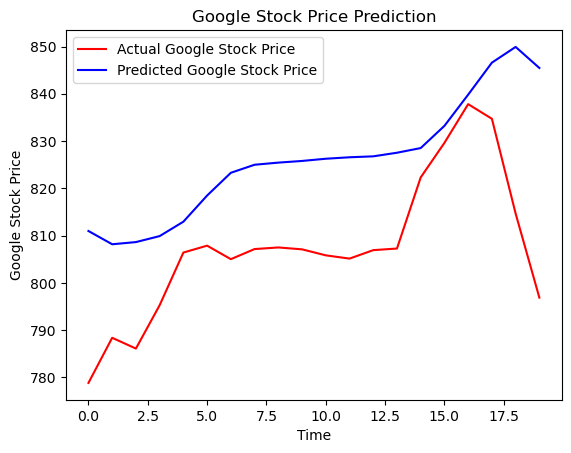

In [20]:
plt.plot(actual_stock_price, color='red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()

In [21]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(actual_stock_price, predicted_stock_price))

In [22]:
print(f"Mean square error : {rmse}")

Mean square error : 21.345249215924202
